## Задача 1

Для выборки N=100, представленной вариационным рядом

| xi | -1 | 0 | 1  | 2  | 3  | 4  | 5 |
|----|----|---|----|----|----|----|---|
| ni | 4  | 6 | 12 | 18 | 31 | 23 | 6 |

- Построить полигон относительных частот и гистограмму накопленных частот.

- Найти выборочное среднее и выборочное среднее квадратичное отклонение.

- Определить доверительный интервал с доверительной вероятностью \alpha=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.

- Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости a=0,05.

- Для вычислений можно использовать язык программирования.

## Решение


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

xi = np.array([-1, 0, 1, 2, 3, 4, 5])
ni = np.array([4, 6, 12, 18, 31, 23, 6])

# относительные частоты
wi = ni / ni.sum()

df = pd.DataFrame({
    "xi": xi,
    "ni": ni,
    "wi": wi
})

print(df)

   xi  ni    wi
0  -1   4  0.04
1   0   6  0.06
2   1  12  0.12
3   2  18  0.18
4   3  31  0.31
5   4  23  0.23
6   5   6  0.06


### Полигон относительных частот

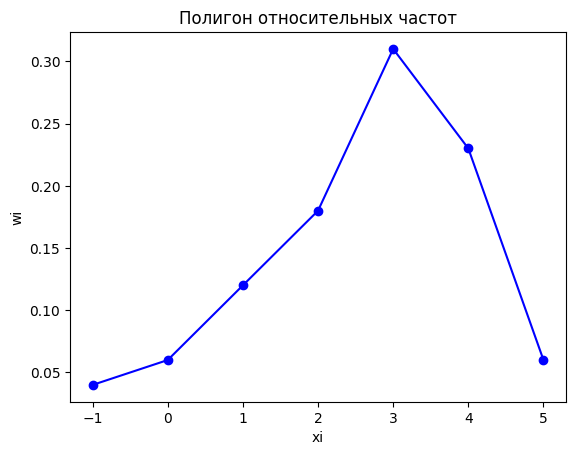

In [8]:
plt.title("Полигон относительных частот")
plt.xlabel("xi")
plt.ylabel("wi")
plt.plot(df["xi"], df["wi"], 'o-b')
# plt.bar(df["xi"], df["wi"])
plt.show()

### Гистограмма накопленных частот

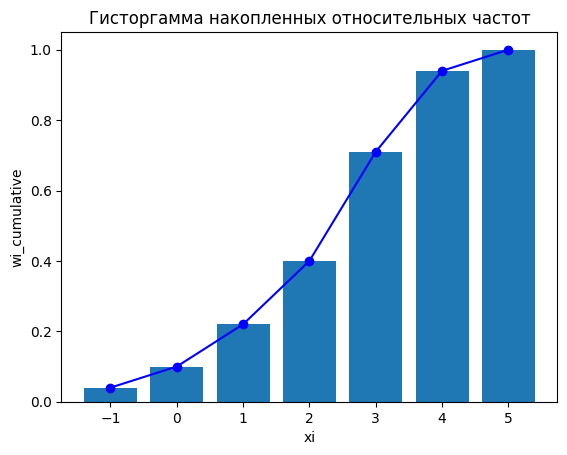

In [9]:
# для относительных частот
df["wi_cumulative"] = df["wi"].cumsum() 
plt.title("Гисторгамма накопленных относительных частот")
plt.xlabel("xi")
plt.ylabel("wi_cumulative")
plt.bar(df["xi"], df["wi_cumulative"])
plt.plot(df["xi"], df["wi_cumulative"], 'o-b')
plt.show()

### Выборочное среднее
$\bar{x_b}=(\sum^n_{i=1}{n_i * x_i})/n$


In [10]:
xsum = (df["xi"]*df["ni"]).sum()
xb = xsum / df["ni"].sum()
print(f"Выборочное среднее: {xb}")

Выборочное среднее: 2.59


### Выборочное среднее квадратичное отклонение

Выборочная дисперсия

${D_b}=\frac{\sum^n_{i=1}({x_i - \bar{x_b})^2}}{n}$

Выборочное среднее квадратичное отклонение

${\sigma_b}=\sqrt{D_b}$

In [11]:
dsum = (df["xi"]- xb).pow(2).sum()
db = dsum / df["ni"].sum()
sigma = math.sqrt(db)
print(f"Выборочная дисперсия: {db:7.4f}")
print(f"Выборочное среднее квардатичное отклонение: {sigma:7.4f}")

Выборочная дисперсия:  0.3044
Выборочное среднее квардатичное отклонение:  0.5517


Несмещенная оценка

${s^2}=\frac{n}{n-1}*{D_b}$

Несмещенное выборочное среднее квадратичное отклонение

${\sigma_b}=\sqrt{s^2}$


In [12]:
n = df["ni"].sum()
s2 = (n / (n-1)) * db
s = math.sqrt(s2)
print(f"Несмещенная выборочная дисперсия: {s2:7.4f}")
print(f"Несмещенное выборочное среднее квардатичное отклонение: {s:7.4f}")

Несмещенная выборочная дисперсия:  0.3074
Несмещенное выборочное среднее квардатичное отклонение:  0.5545


### Доверительный интервал

Определить доверительный интервал с доверительной вероятностью y=0.95 для оценки математического ожидания генеральной совокупности в предположении, что среднее квадратичное уклонение генеральной совокупности равно исправленному выборочному среднему s.

- объем выборки n = 100
- выборочное среднее ${\bar{x}} = 2.59$ 
- среднее квадратичное уклонение ${\sigma} = s =  0.5545$ 
- доверительная вероятность y = 0.95

Из соотношения 2Ф(t) = 0.95 получим Ф(t) = 0.475.
По таблице находим t = 1.96

Найдем точность оценки:

$\delta = t * \sigma /\sqrt{n} = (1.96 * 0.5545) / 10 = 0.1087  $ 

Доверительный интервал:

${\bar{x}} - \delta = 2.59 - 0.1087 = 2.4813 $;
 
${\bar{x}} + \delta = 2.59 + 0.1087 = 2.6987 $;

2.4813 < a < 2.6987


In [ ]:
### Проверка гипотезы о нормальности закона распределения 

Проверить гипотезу о нормальности закона распределения генеральной совокупности, используя критерий Пирсона с уровнем значимости a=0,05.


